In [1]:
import networkx as nx
import ndlib.models.ModelConfig as mc
from bokeh.io import show
import ndlib.models.epidemics.SIModel as si
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
import json
# Network topology
G = nx.karate_club_graph()
#fh=open("usair.txt", 'rb')
#G = nx.read_weighted_edgelist(fh,nodetype=None, encoding='utf-8')
#fh.close()
#H = nx.convert_node_labels_to_integers(G, first_label=0, ordering="default", label_attribute = None)

In [2]:
from ndlib.utils import multi_runs
import warnings
warnings.filterwarnings("ignore")
nodes = nx.density(G)
b = nodes
it =10
i=1
j=33

In [3]:
b

0.13903743315508021

In [4]:
#--------------------------------------------------------------
model = si.SIModel(G)
config = mc.Configuration()

config.add_model_parameter('beta', b)

infected_nodes = [1,
34,
33,
2,
3]
config.add_model_initial_configuration("Infected", infected_nodes)
model.set_initial_status(config)

#iterations = model.iteration_bunch(it)
#trends = model.build_trends(iterations)
trends = multi_runs(model, execution_number=10, iteration_number=it, nprocesses=4)
#--------------------------------------------------------------
model1 = si.SIModel(G)
config = mc.Configuration()

config.add_model_parameter('beta', b)

infected_nodes1 = [34,
1,
33,
2,
3]
config.add_model_initial_configuration("Infected", infected_nodes1)
model1.set_initial_status(config)

#iterations = model1.iteration_bunch(it)
#trends1 = model1.build_trends(iterations)
trends1 = multi_runs(model1, execution_number=10, iteration_number=it, nprocesses=4)
#--------------------------------------------------------------

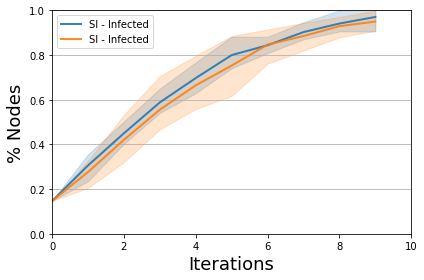

<Figure size 432x288 with 0 Axes>

In [7]:
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
viz = DiffusionTrendComparison([model,model1], [trends,trends1], statuses=['Infected'])
viz.plot()
#viz.plot("PR_TC_KC.png",percentile=90)

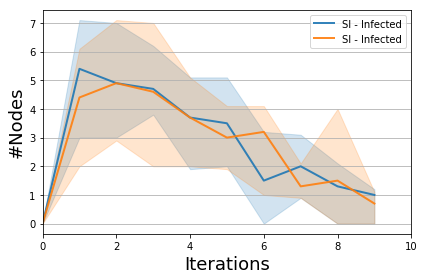

<Figure size 432x288 with 0 Axes>

In [8]:
from ndlib.viz.mpl.PrevalenceComparison import DiffusionPrevalenceComparison
viz = DiffusionPrevalenceComparison([model, model1], [trends, trends1], statuses=['Infected'])
viz.plot()
#viz.plot("PR_TC_KCp.png",percentile=90)